### Written by Federica B. Bianco @fedhere
### NYU CUSP PUI
### Assignment 1 Homework 3
### This is a skeleton & instruction notebook
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb and Lingyi'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from scipy.optimize import curve_fit, minimize
# for plotting the gaussian to the distribution of means
from scipy.stats import norm

## choose which distributions to use 

In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [3]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

![numpy](numpy_chisq.png)


In [4]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

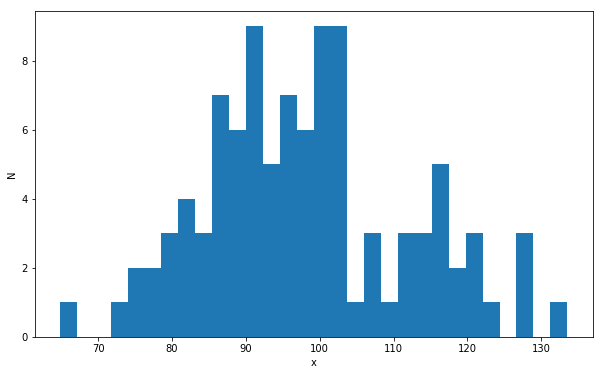

In [5]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.figure(figsize=(10,6))
plt.hist(md['chisq'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.05, standard deviation: 13.73


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [7]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


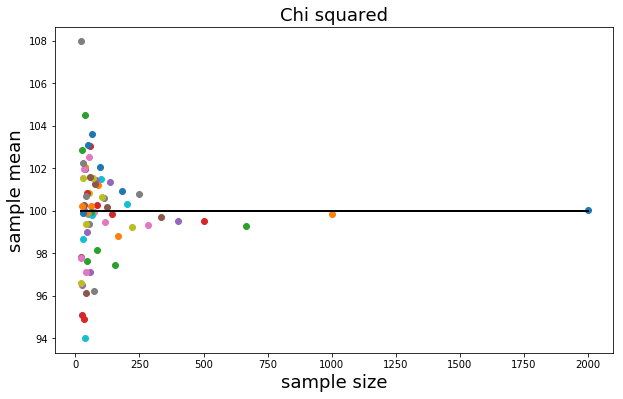

In [8]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

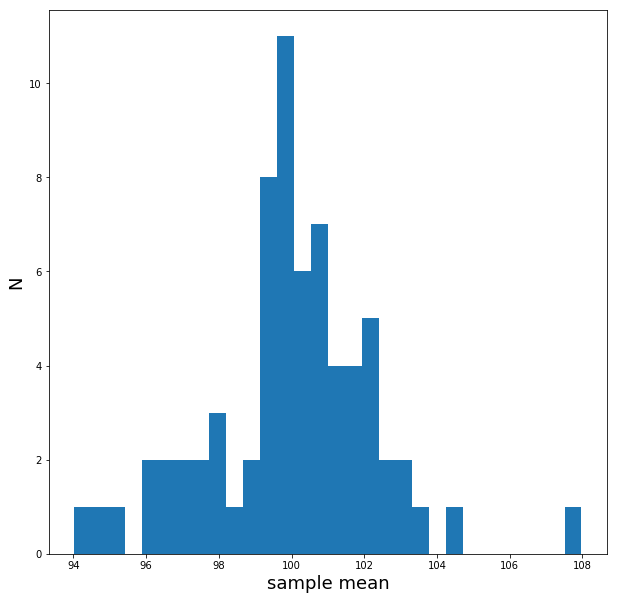

In [9]:
allmeans = list(md['chisq']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

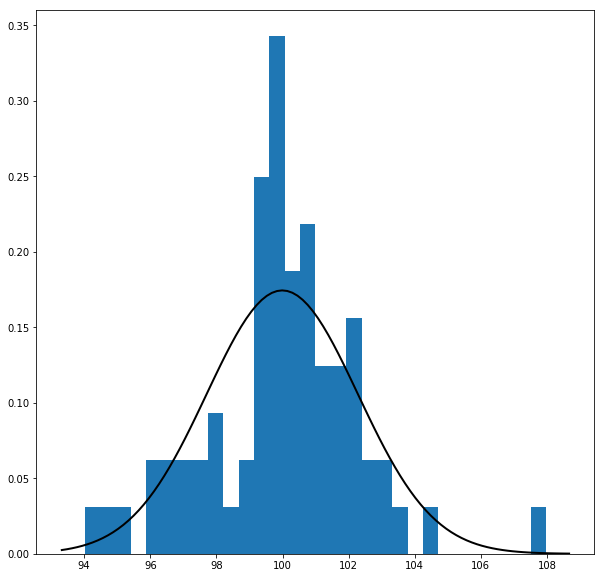

In [10]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

plt.figure(figsize=(10, 10))
plt.hist(allmeans, bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#pl.title(title)

plt.show()

## Figure 3: [...]

# Do it for the Normal distribution


In [11]:
distributions = ['lnorm']

In [12]:
mymean = 100

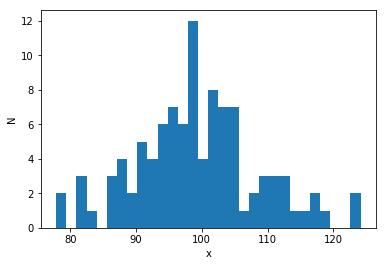

In [13]:
md['lnorm'] = np.random.normal(df, 10, size=100)
plt.hist(md['lnorm'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

In [14]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 99.29, standard deviation: 9.24


In [15]:
mysize = (np.random.rand(100) * 1000).astype(int)

In [16]:
print (mysize, mysize.shape)

[120  57  45 625 980 516 532 388  68 142 542 554 230 614 887  69 196 531
 385 244 753  22 522 591 178 288 810 335 573  55 460 689  86 416 452 479
 415 309  39 293 968  78 778 242  87 291 119 203 572 650 536 108 212 594
 731 929 992 191 476 765 852 148 500 219 145 153 640 942  30  61 345 619
  35 842 675 968 610 534 938 454 864  54 678 779 999 464 766 494 628   0
 883 257  50 221 295 133 577 332 734 848] (100,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


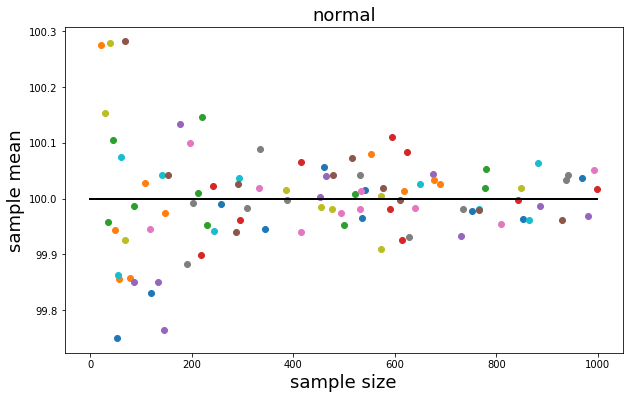

In [17]:
md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

ValueError: max must be larger than min in range parameter.

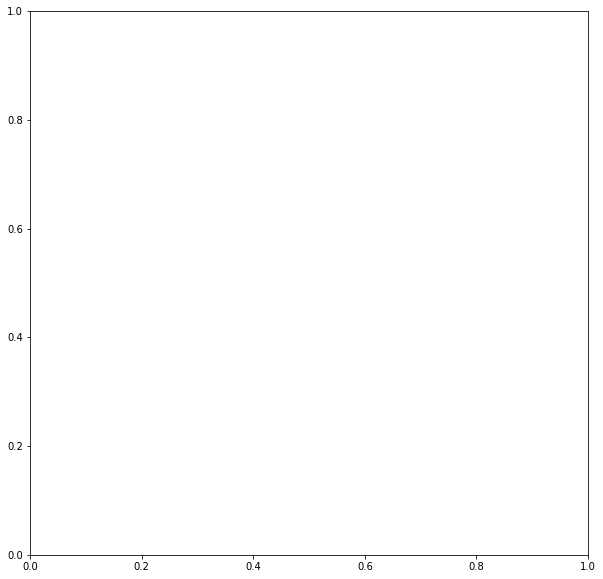

In [18]:
allmeans = list(md['lnorm']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

In [ ]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

plt.figure(figsize=(10, 10))
plt.hist(allmeans, bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#pl.title(title)

plt.show()

# Do it for the Poisson distribution

In [ ]:
distributions = ['pois']

In [ ]:
mymean = 100

In [ ]:
md['pois'] = np.random.poisson(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['pois'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

In [ ]:
md.keys()

In [ ]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

In [ ]:
mysize = (1999 / (np.array(range(1, 100)))).astype(int)

In [ ]:
print (mysize, mysize.shape)

In [ ]:
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(df, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
allmeans = list(md['pois']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

In [ ]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

plt.figure(figsize=(10, 10))
plt.hist(allmeans, bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#pl.title(title)

plt.show()

# Do it for the Binomial distribution

In [ ]:
distributions = ['binomial']

In [ ]:
md['binomial'] = np.random.binomial(2*df, 0.5, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['binomial'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

In [ ]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

In [ ]:
mysize = (1784 / (np.array(range(1, 100)))).astype(int)

In [ ]:
print (mysize, mysize.shape)

In [ ]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(2*df, 0.5, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
allmeans = list(md['binomial']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

In [ ]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

plt.figure(figsize=(10, 10))
plt.hist(allmeans, bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#pl.title(title)

plt.show()

In [ ]:
##your code here...

# Do it for another distribution

In [ ]:
distributions = ['laplace']

In [ ]:
md['laplace'] = np.random.laplace(df, 1.0, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['laplace'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')

In [ ]:
print ("laplace mean: %.2f, standard deviation: %.2f"%(md['laplace'].mean(), md['laplace'].std()))

In [ ]:
mysize = (np.random.rand(100) * 1000).astype(int)

In [ ]:
print (mysize, mysize.shape)

In [ ]:
md['laplace'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['laplace'][n] = np.random.laplace(df, 1.0, size = n)
    
# save the means for plotting later    

md['laplace']['means'] = {}
axlaplace_mu_n = plt.figure(figsize=(10,6)).add_subplot(111)

for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        #and plot it
        axlaplace_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlaplace_mu_n.set_xlabel('sample size', fontsize=18)
        axlaplace_mu_n.set_ylabel('sample mean', fontsize=18)
        axlaplace_mu_n.set_title('Laplace', fontsize=18)
        axlaplace_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
allmeans = list(md['laplace']['means'].values())

plt.figure(figsize=(10, 10))
plt.hist(allmeans,bins=30)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)

In [ ]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

plt.figure(figsize=(10, 10))
plt.hist(allmeans, bins=30, normed=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density functions
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k', linewidth=2)
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
#pl.title(title)

plt.show()

In [ ]:
##your code here...